In [7]:
import os
import numpy as np
import cv2
from matplotlib import cm, pyplot as plt


def plot_image(image, title="Image"):
    if isinstance(image, bytes):
        image = np.frombuffer(image, np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

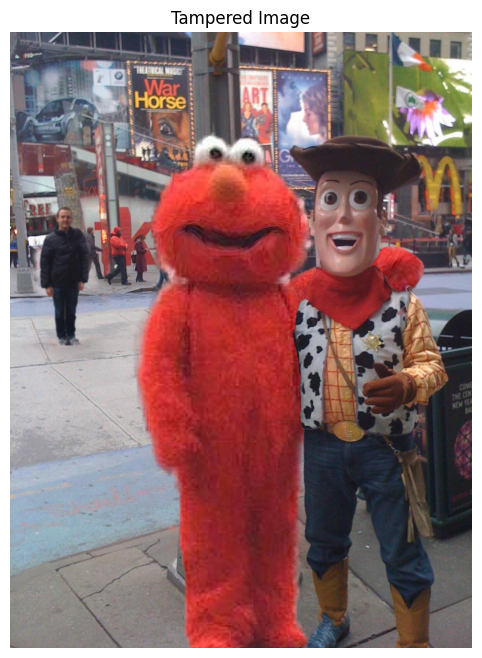

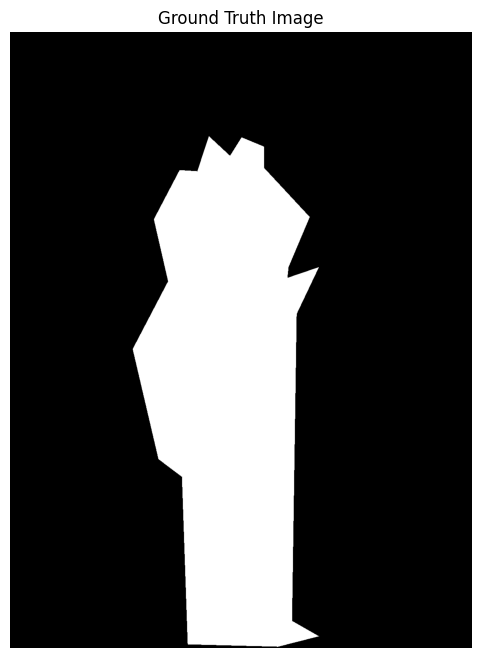

In [8]:
img_folder = "/home/nhat82125/ForgeryX-Server/example"
img_name = "im1_edit3"

tp_img = cv2.imread(os.path.join(img_folder, f"{img_name}.jpg"))
gt_img = cv2.imread(os.path.join(img_folder, f"{img_name}.png"))

plot_image(tp_img, "Tampered Image")
plot_image(gt_img, "Ground Truth Image")

In [9]:
tp_img_gray = cv2.cvtColor(tp_img, cv2.COLOR_BGR2GRAY)
if tp_img_gray is None:
    raise ValueError("Could not load image.")

height, width = tp_img_gray.shape
diff_maps = []  

quality_range = (75, 100)
threshold = 30

for quality in range(quality_range[0], quality_range[1] + 1, 5):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]

    _, encoded_img = cv2.imencode('.jpg', tp_img_gray, encode_param)
    recompressed = cv2.imdecode(encoded_img, cv2.IMREAD_GRAYSCALE)
    
    if recompressed is None or recompressed.shape != tp_img_gray.shape:
        continue
    
    diff = cv2.absdiff(tp_img_gray, recompressed)
    diff_normalized = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)
    _, diff_thresholded = cv2.threshold(diff_normalized, threshold, 255, cv2.THRESH_BINARY)
    
    diff_maps.append((quality, diff_thresholded))

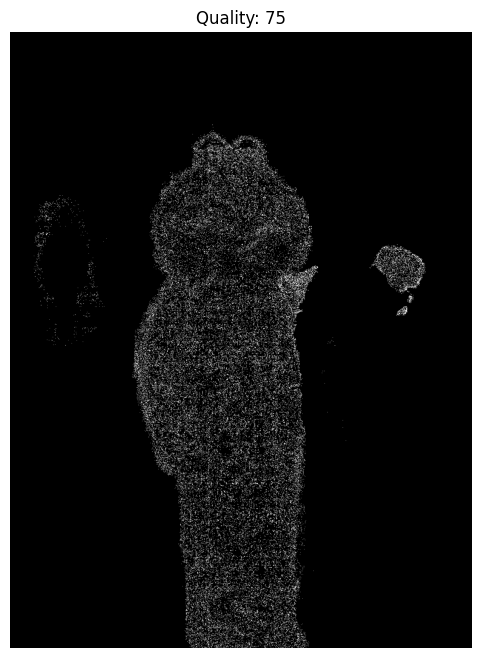

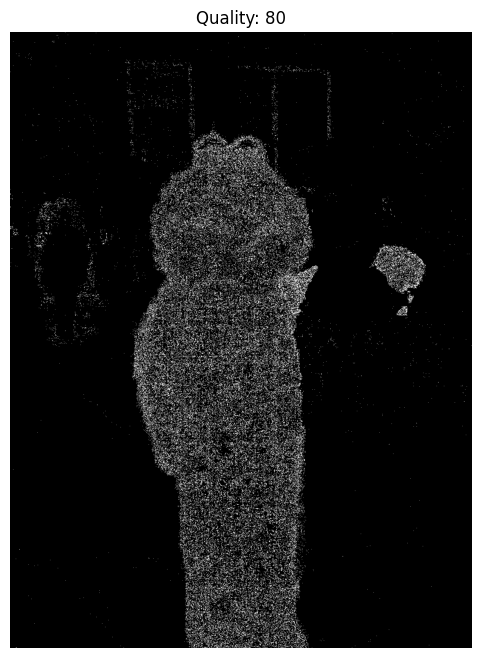

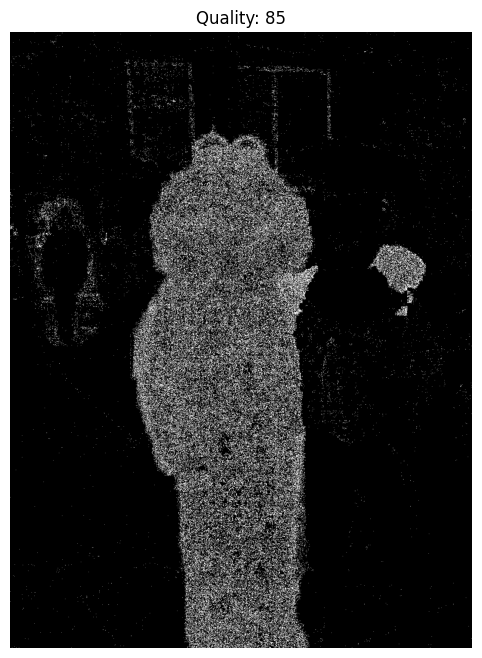

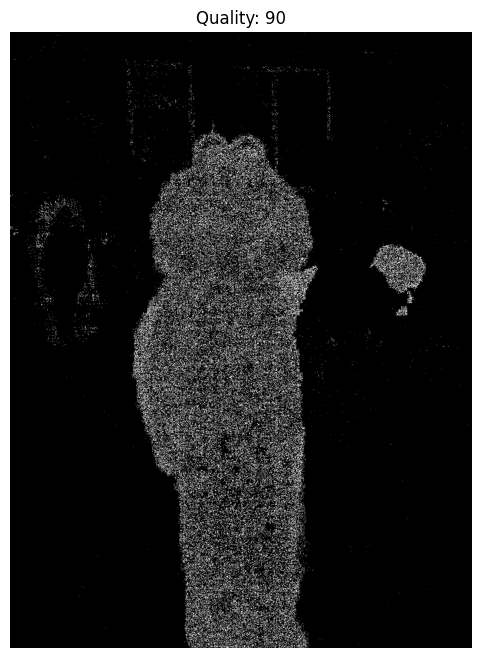

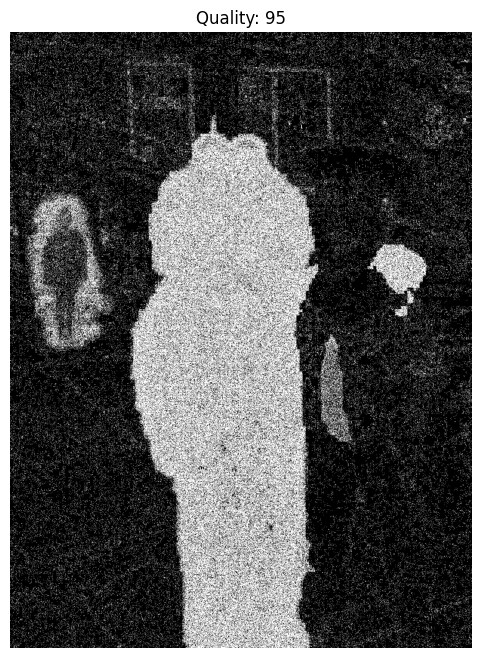

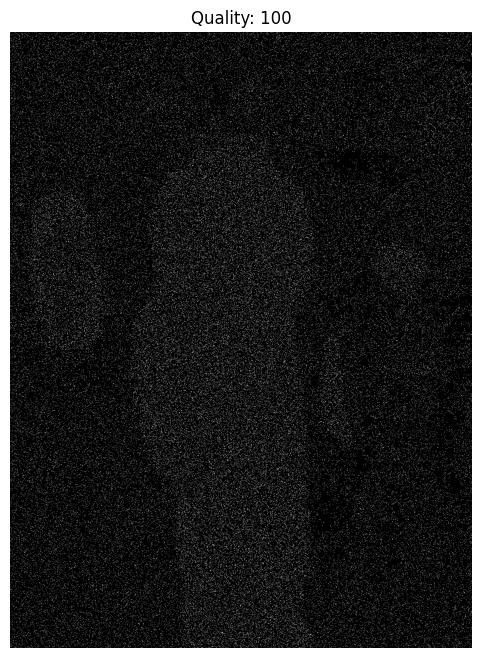

In [10]:
for diff_map in diff_maps:
    plot_image(diff_map[1], f"Quality: {diff_map[0]}")